In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras import Model
from keras.layers import Input, Dense, Lambda, Conv2D, Flatten, Reshape, Conv2DTranspose
from keras.metrics import binary_crossentropy, Mean
import keras.backend as K
from keras.utils import plot_model
from keras.optimizers import Adam
from tensorflow.math import reduce_mean, reduce_sum

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf

import os

In [2]:
path = r"C:\Users\User\Desktop\Homework\S5\PRO1\A_Z Handwritten Data.csv"
data = pd.read_csv(path).astype('float32')
data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [3]:
x = data.drop('0', axis=1)
y = data['0']
x /= 255

In [4]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28,1))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28,1))
train_x = np.concatenate((train_x, test_x), axis = 0)

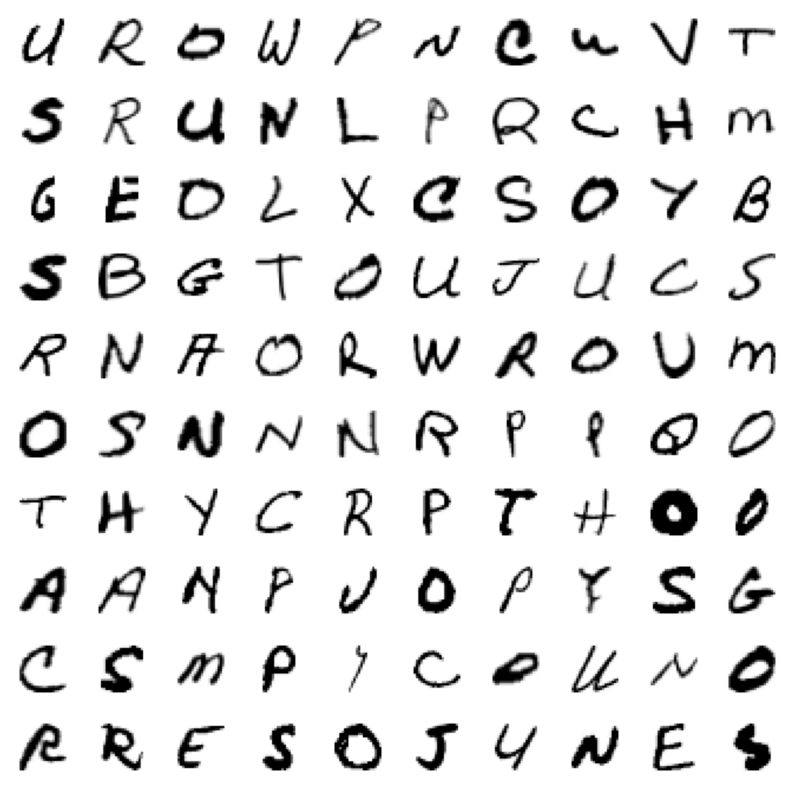

In [5]:
plt.figure(figsize=(10, 10))
for i in range(100):
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(test_x[i], cmap="Greys")
    plt.axis("off")
plt.show()

In [6]:
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [7]:
image_size = test_x.shape[1]

In [8]:
input_shape = (image_size, image_size, 1)
kernel_size = 3
filters = [32, 64]
latent_dim = 2
inside_dim = 16
epochs = 30
batch_size = 128

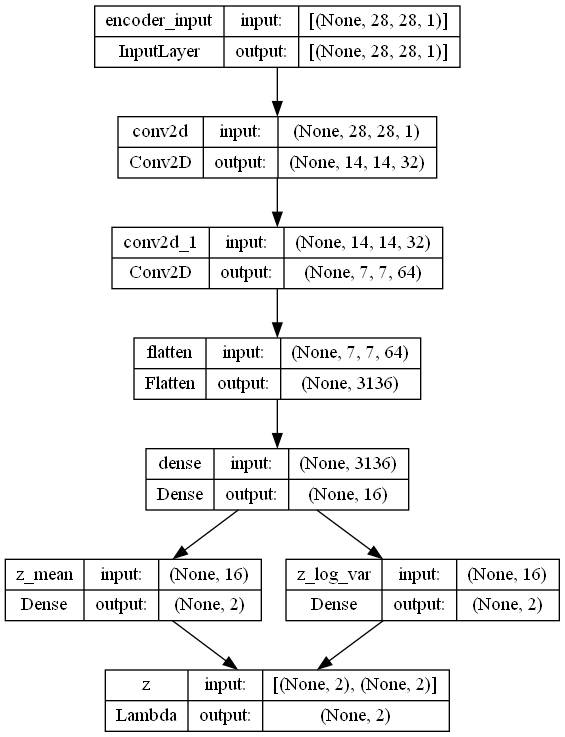

In [9]:
inputs = Input(shape=input_shape,
                       name='encoder_input')
x = inputs

for f in filters:
    x = Conv2D(filters=f,
                kernel_size=kernel_size,
                strides=2,
                activation='relu',
                padding='same')(x)

shape = K.int_shape(x)

x = Flatten()(x)
x = Dense(inside_dim, activation='relu')(x)

z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)
z = Lambda(sampling, output_shape=(latent_dim, ), name='z')([z_mean, z_log_var])

encoder = Model(inputs,
                [z_mean, z_log_var, z],
                name='encoder')
plot_model(encoder, show_shapes=True)

In [10]:
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 32)   320         ['encoder_input[0][0]']          
                                                                                                  
 conv2d_1 (Conv2D)              (None, 7, 7, 64)     18496       ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 3136)         0           ['conv2d_1[0][0]']               
                                                                                            

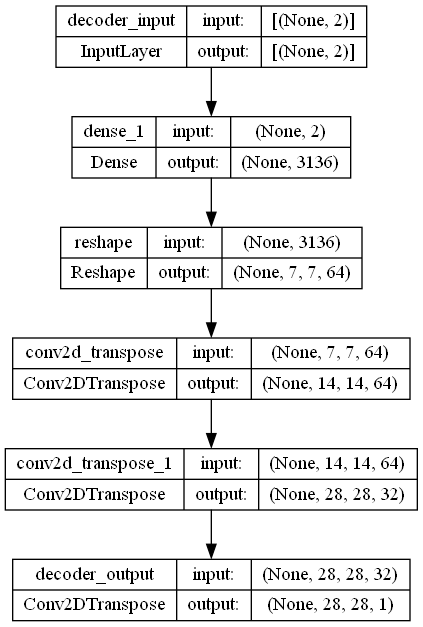

In [11]:
latent_inputs = Input(shape=(latent_dim, ), name='decoder_input')
x = Dense(shape[1] * shape[2] * shape[3], activation='relu')(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)

for f in filters[::-1]:
    x = Conv2DTranspose(filters=f,
                        kernel_size=kernel_size,
                        activation='relu',
                        strides=2,
                        padding='same')(x)

outputs = Conv2DTranspose(filters=1,
                            kernel_size=kernel_size,
                            activation='sigmoid',
                            padding='same',
                            name='decoder_output')(x)

decoder = Model(latent_inputs, outputs, name='decoder')
plot_model(decoder, show_shapes=True)

In [12]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 3136)              9408      
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                       
                                                                 
 decoder_output (Conv2DTrans  (None, 28, 28, 1)        289 

In [13]:
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = Mean(name="total_loss")
        self.reconstruction_loss_tracker =Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - K.square(z_mean) - K.exp(z_log_var))
            kl_loss = reduce_mean(reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [14]:
save_dir = "wagi_letter_vae_cnn"
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, 'vae_cnn_mnist.tf')

In [15]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=Adam())
vae.load_weights(filepath)

In [16]:
vae.fit(train_x, epochs=epochs, batch_size=batch_size)

Epoch 1/30
2910/2910 [==============================] - 158s 54ms/step - loss: 222.3089 - reconstruction_loss: 193.4539 - kl_loss: 5.0118
Epoch 2/30
2910/2910 [==============================] - 158s 54ms/step - loss: 185.8862 - reconstruction_loss: 178.9232 - kl_loss: 5.7796
Epoch 3/30
2910/2910 [==============================] - 160s 55ms/step - loss: 181.9747 - reconstruction_loss: 175.3041 - kl_loss: 6.0874
Epoch 4/30
2910/2910 [==============================] - 158s 54ms/step - loss: 179.9042 - reconstruction_loss: 173.3512 - kl_loss: 6.2401
Epoch 5/30
2910/2910 [==============================] - 162s 56ms/step - loss: 178.6380 - reconstruction_loss: 172.0488 - kl_loss: 6.3167
Epoch 6/30
2910/2910 [==============================] - 162s 56ms/step - loss: 177.6900 - reconstruction_loss: 171.0430 - kl_loss: 6.3914
Epoch 7/30
2910/2910 [==============================] - 164s 56ms/step - loss: 176.9133 - reconstruction_loss: 170.2020 - kl_loss: 6.4391
Epoch 8/30
2910/2910 [============

In [17]:
vae.save_weights(filepath)

1/1 [==============================] - 0s 19ms/step


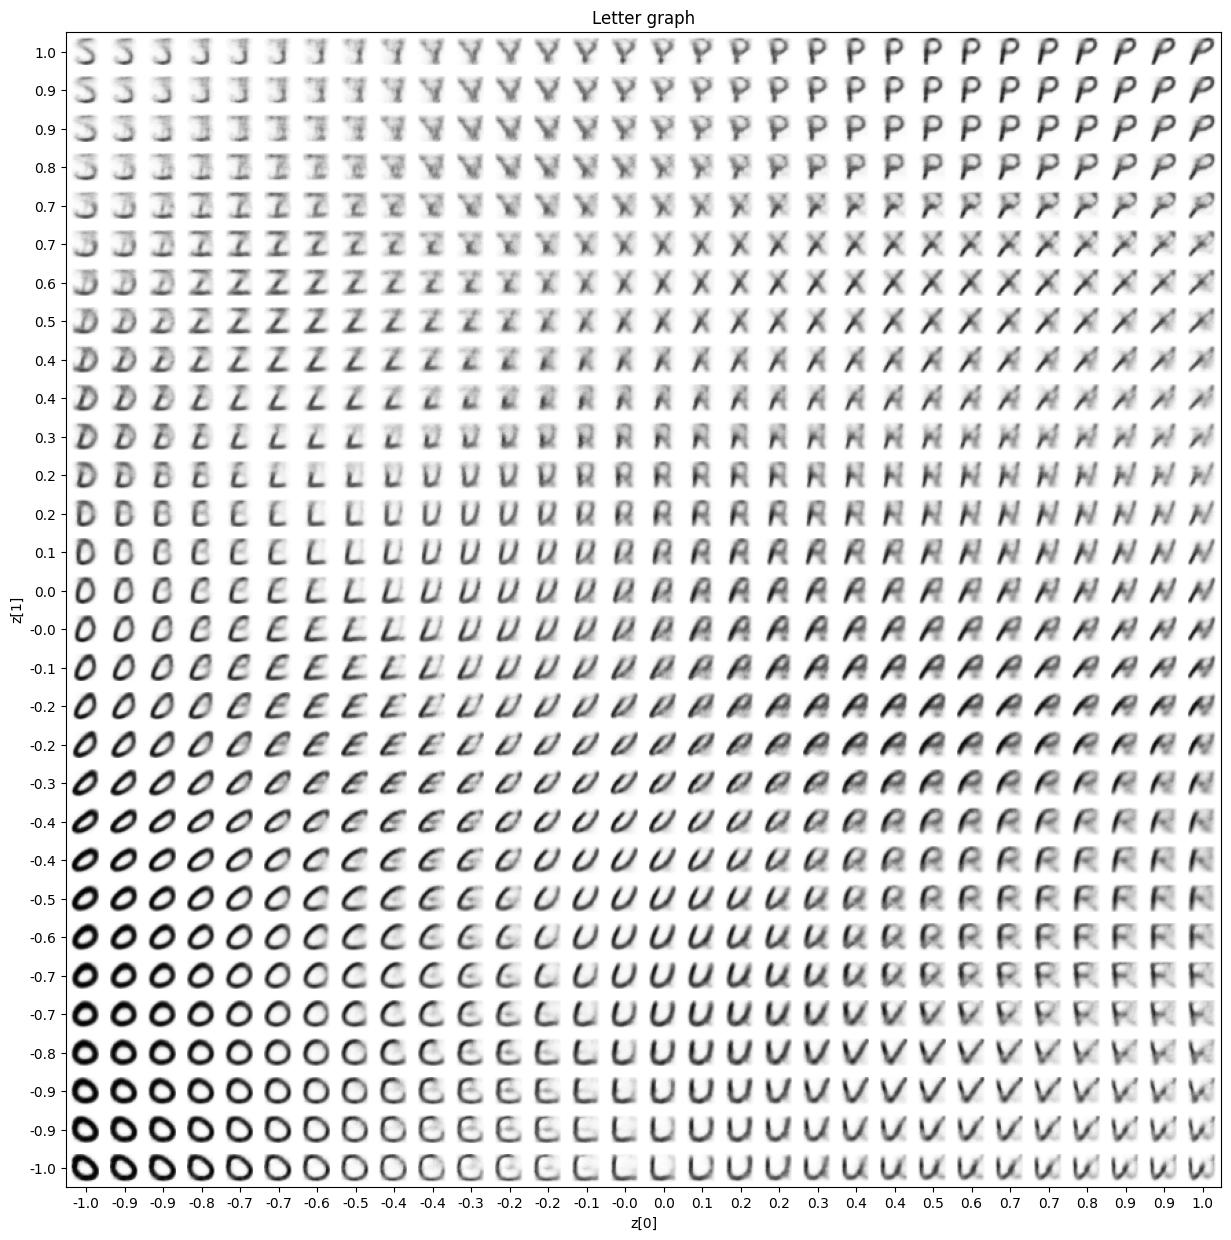

In [16]:
def plot_latent_space(vae, n=30, figsize=15):
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n, 1))
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size, 1)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.title("Letter graph")
    plt.imshow(figure, cmap="Greys")
    plt.show()


plot_latent_space(vae)